<a href="https://colab.research.google.com/github/TahaFayyaz1/Linear-Regression/blob/main/Islamabad_Air_Quality_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from kagglehub import KaggleDatasetAdapter
import kagglehub
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## Data Loading

In [10]:
# Set the path to the file you'd like to load
file_path = "final_data.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "diraf0/islamabad-pakistan-air-quality-data",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

df.head()

/tmp/ipython-input-331623691.py:5: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


Using Colab cache for faster access to the 'islamabad-pakistan-air-quality-data' dataset.


,Date,Temperature,Humidity,NO2,SO2,PM2.5,Year
0,1 Aug,25.60,59.72,11.43,5.72,18.68,2019
1,2 Aug,29.00,43.44,12.34,5.95,27.35,2019
2,3 Aug,28.43,47.45,10.95,5.56,24.01,2019
3,4 Aug,31.47,44.23,14.66,4.85,28.44,2019
4,5 Aug,31.17,49.04,8.27,5.13,27.78,2019


## Definition of Features and Target

In [41]:
X = df[['Temperature', 'Humidity', 'NO2', 'SO2']]
y = df['PM2.5']

## Split of Data

In [54]:
X_train,X_test, y_train, y_test = train_test_split(X, y, train_size=0.95, random_state = 42)

## Training of Data

In [55]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Predictions and Evalutaion

In [56]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}")
print(f"RMSE: {np.sqrt(mse):.2f}")
print(f"R²: {r2:.2f}")

MSE: 257.58
RMSE: 16.05
R²: 0.47


## Visualizing the Results

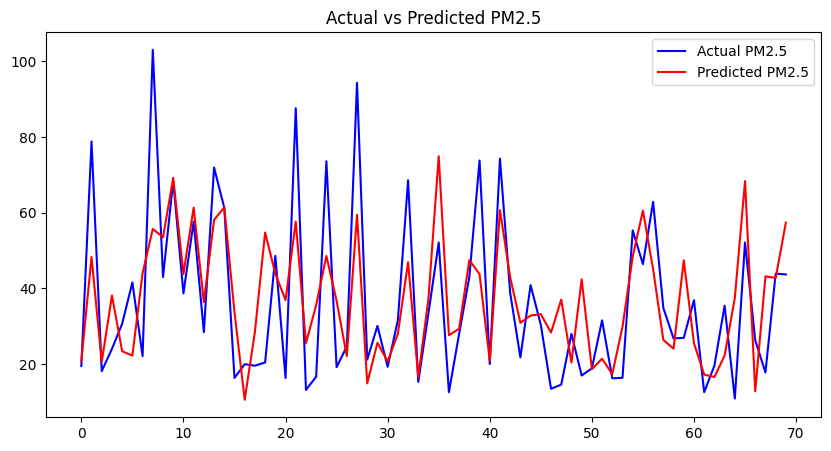

In [63]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(y_test.values, label='Actual PM2.5', color='blue')
plt.plot(y_pred, label='Predicted PM2.5', color='red')
plt.legend()
plt.title('Actual vs Predicted PM2.5')
plt.show()


### Effect of each Feature on the Target

In [64]:
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
print(coef_df)


       Feature  Coefficient
0  Temperature    -1.328349
1     Humidity    -0.098524
2          NO2     0.769929
3          SO2    -0.069842


# Forecasting Future Value

In [ ]:
# Enter the value of Temperature, Humidity, NO2, S02 on which you would like to predict
temp = #here
hum = #here
no2 = #here
so2 = #here



future_X = pd.DataFrame({
    'Temperature': [temp],
    'Humidity': [hum],
    'NO2': [no2],
    'SO2': [so2]
})
predicted_pm25 = model.predict(future_X)
print(predicted_pm25)
